In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, ConfusionMatrixDisplay,confusion_matrix


In [66]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Optional: Set wider column display for better visibility
pd.set_option('display.width', 1000)

Dataframe load

In [67]:
df = pd.read_csv("predict_students_dropout_and_academic_success.csv",delimiter=";")

Label enconding

In [68]:
fields = ["Course",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Application mode",
    "Nacionality",
    "Application mode",
    "Application order",
    "Tuition fees up to date",
    "Target"]

df_encoded = pd.DataFrame()

for i in fields:
    le = LabelEncoder()
    df_encoded[i] = le.fit_transform(df[i])

In [69]:
display(df.head(5))
display(df_encoded.head(5))
for i in df.columns:
    print(i)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Application mode,Nacionality,Application order,Tuition fees up to date,Target
0,1,12,9,5,9,7,0,5,1,0
1,10,0,2,3,3,5,0,1,0,2
2,4,21,26,9,9,0,0,5,0,0
3,14,22,26,5,3,7,0,2,1,2
4,2,21,27,9,9,11,0,1,1,2


Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target


One hot encoding

In [70]:
df_one_hot_encoded = pd.DataFrame()
one_hoe_encoding_label = ["Course",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Application mode",
    "Nacionality",
    "Application mode",
    "Application order"]
for i in one_hoe_encoding_label:
    ohe = OneHotEncoder(sparse_output=False)
    encoded = ohe.fit_transform(df_encoded[[i]])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([i]))
    df_one_hot_encoded = pd.concat([df_one_hot_encoded, encoded_df], axis=1)

In [71]:
display(df_one_hot_encoded.head(5))

,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Mother's qualification_0,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_7,Mother's qualification_8,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_13,Mother's qualification_14,Mother's qualification_15,Mother's qualification_16,Mother's qualification_17,Mother's qualification_18,Mother's qualification_19,Mother's qualification_20,Mother's qualification_21,Mother's qualification_22,Mother's qualification_23,Mother's qualification_24,Mother's qualification_25,Mother's qualification_26,Mother's qualification_27,Mother's qualification_28,Father's qualification_0,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_7,Father's qualification_8,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_15,Father's qualification_16,Father's qualification_17,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_21,Father's qualification_22,Father's qualification_23,Father's qualification_24,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_28,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_32,Father's qualification_33,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_11,Mother's occupation_12,Mother's occupation_13,Mother's occupation_14,Mother's occupation_15,Mother's occupation_16,Mother's occupation_17,Mother's occupation_18,Mother's occupation_19,Mother's occupation_20,Mother's occupation_21,Mother's occupation_22,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_11,Father's occupation_12,Father's occupation_13,Father's occupation_14,Father's occupation_15,Father's occupation_16,Father's occupation_17,Father's occupation_18,Father's occupation_19,Father's occupation_20,Father's occupation_21,Father's occupation_22,Father's occupation_23,Father's occupation_24,Father's occupation_25,Father's occupation_26,Father's occupation_27,Father's occupation_28,Father's occupation_29,Father's occupation_30,Father's occupation_31,Father's occupation_32,Father's occupation_33,Father's occupation_34,Father's occupation_35,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_6,Application mode_7,Application mode_8,Application mode_9,Application mode_10,Application mode_11,Application mode_12,Application mode_13,Application mode_14,Application mode_15,Application mode_16,Application mode_17,Nacionality_0,Nacionality_1,Nacionality_2,Nacionality_3,Nacionality_4,Nacionality_5,Nacionality_6

Aplicando regressão logisitica em nos três dados

Aplicando no dataframe sem nenhum tratamento

In [72]:
display(df.iloc[:, :-1].head(5))
display(df_encoded.iloc[:, -1].head(5))

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [73]:
max_iter=10000

<Axes: >

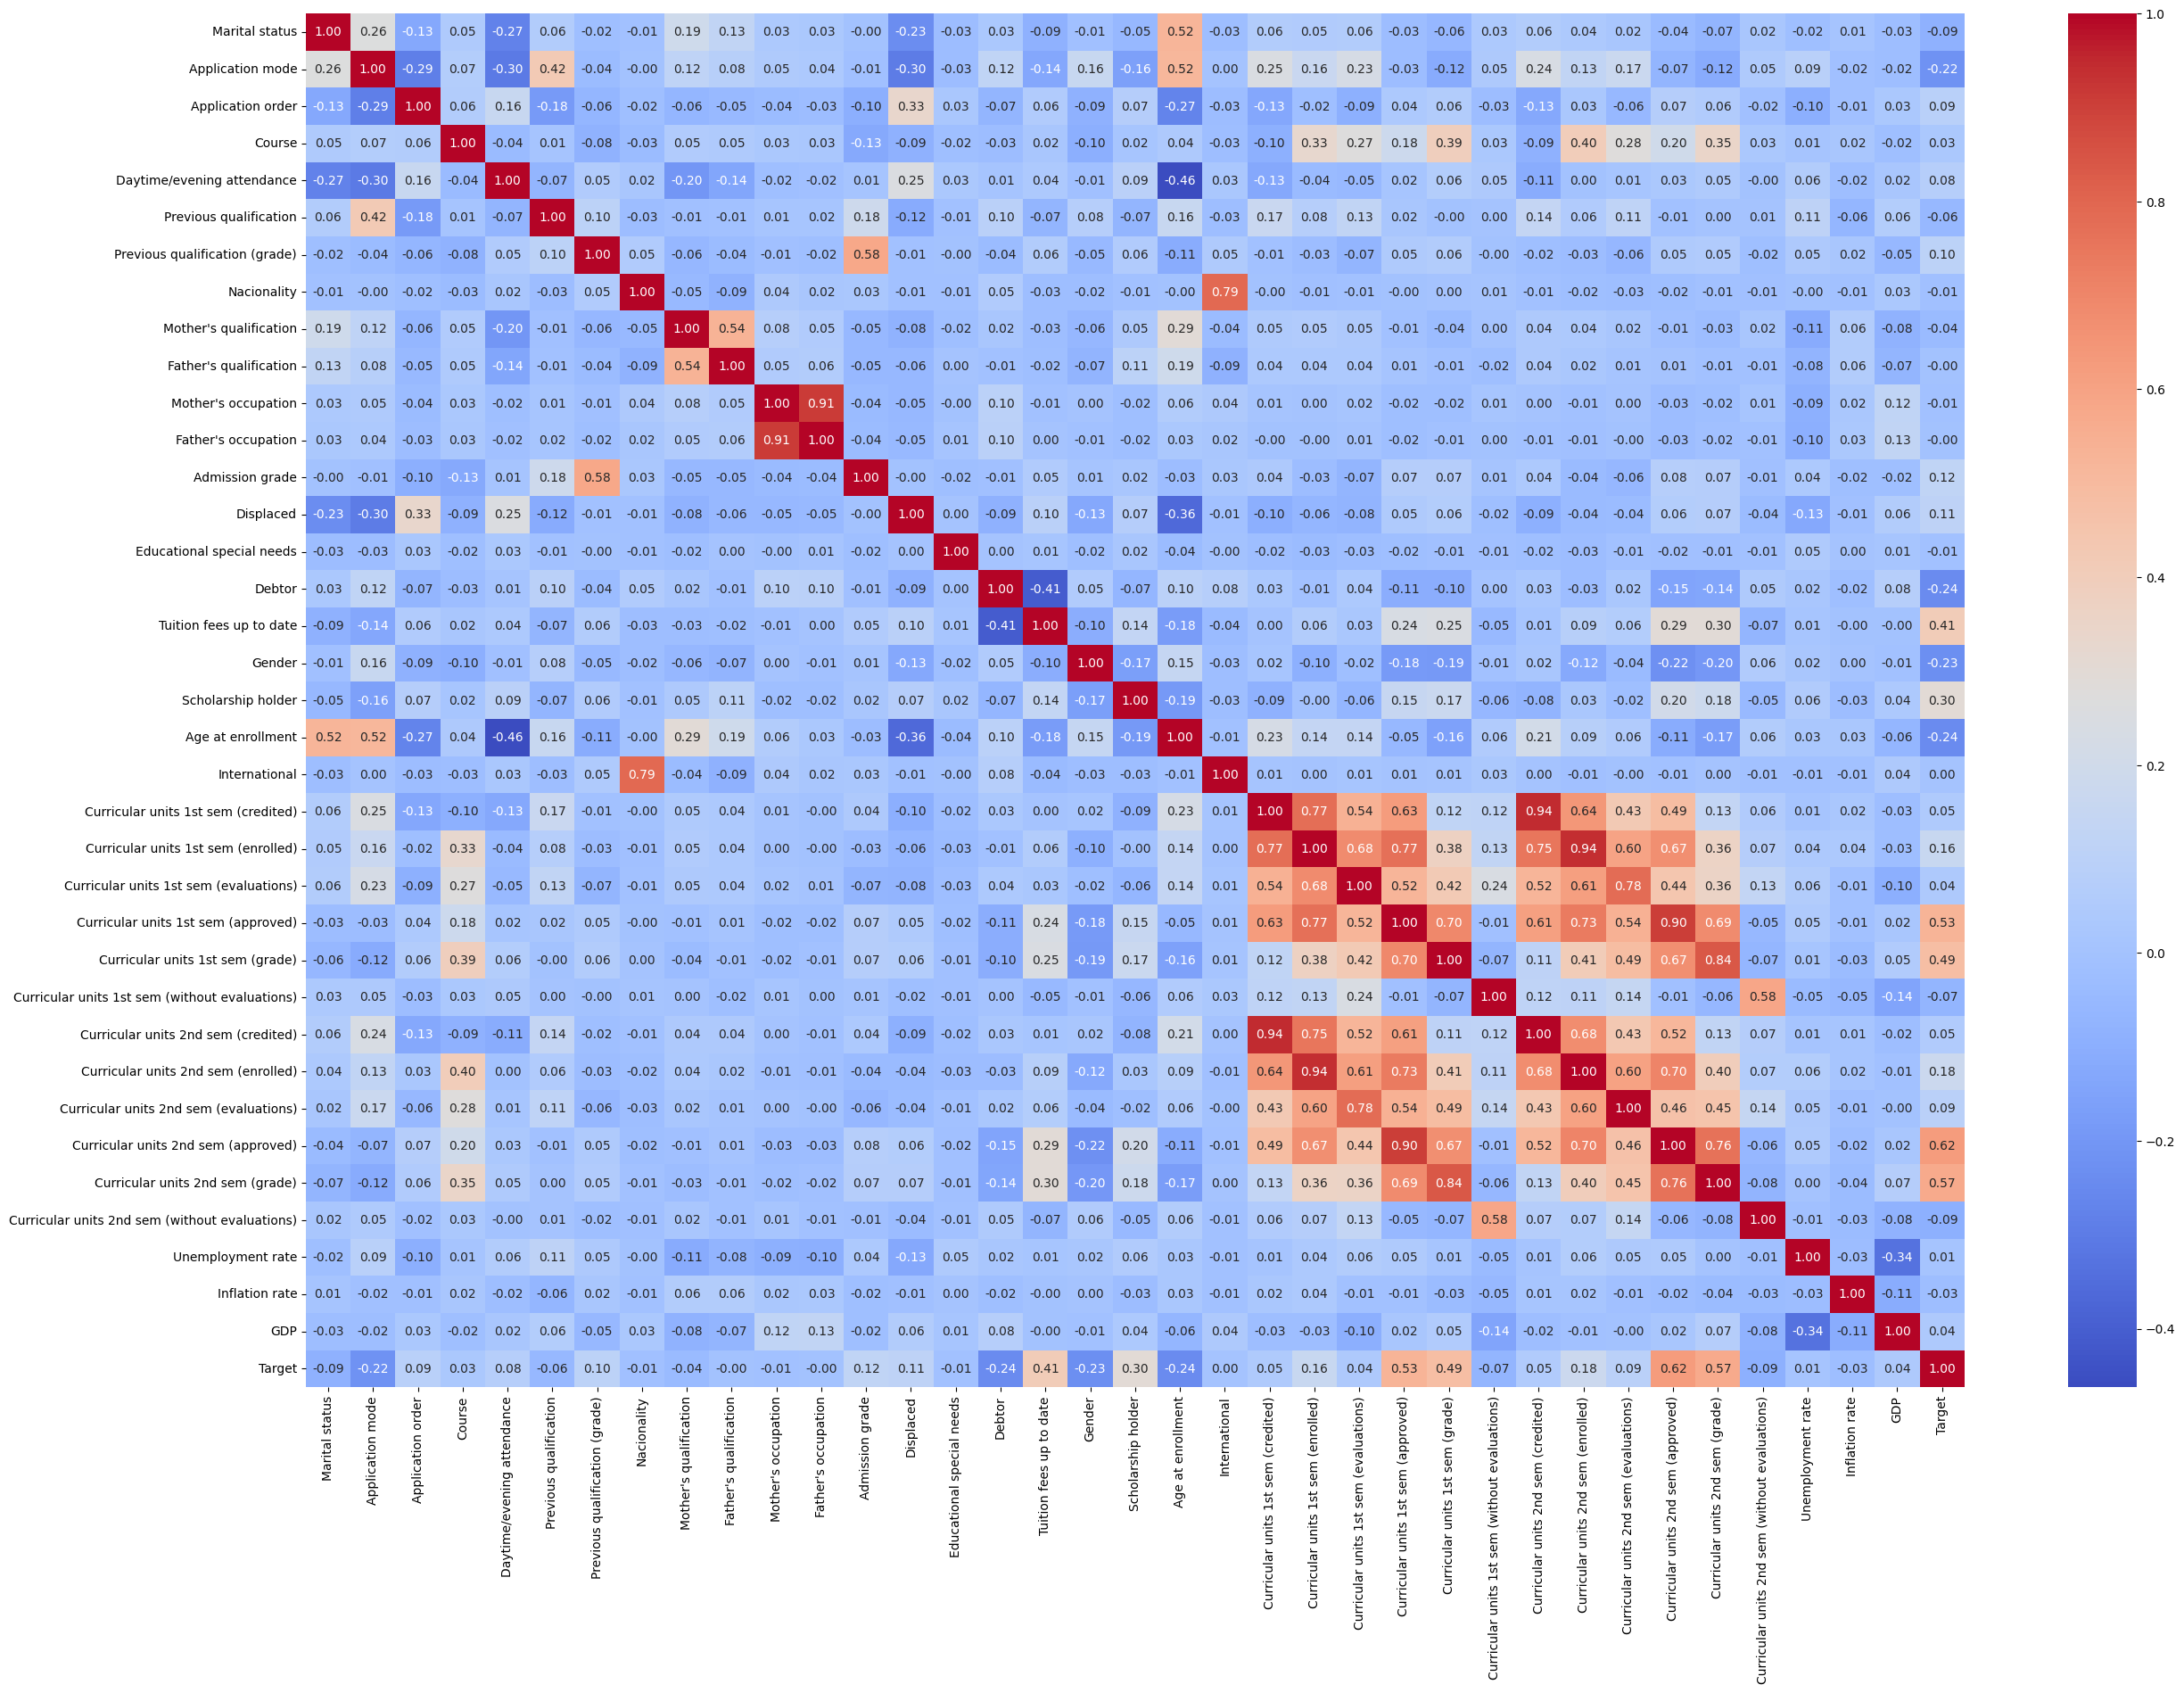

In [74]:
le = LabelEncoder()

df["Target"] = le.fit_transform(df["Target"])
plt.figure(figsize=(30, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Accuracy:  0.7480
Precision: 0.7290
Recall:    0.7480
F1 Score:  0.7321
Log Loss:  0.6171


c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


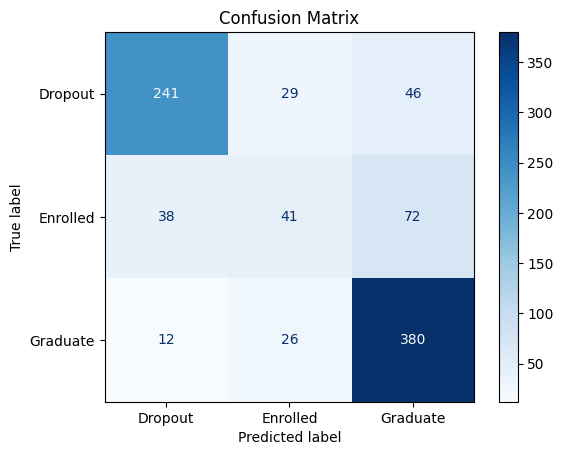


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.8282    0.7627    0.7941       316
    Enrolled     0.4271    0.2715    0.3320       151
    Graduate     0.7631    0.9091    0.8297       418

    accuracy                         0.7480       885
   macro avg     0.6728    0.6478    0.6519       885
weighted avg     0.7290    0.7480    0.7321       885



In [75]:
lr1 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1],df_encoded["Target"],test_size=0.2,random_state=42)
lr1.fit(X=x_train,y=y_train)

y_pred = lr1.predict(X=x_test)
y_pred_proba = lr1.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

In [76]:
display(df_encoded.iloc[:, :-1].head(5))
display(df_encoded.iloc[:, -1].head(5))

,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Application mode,Nacionality,Application order,Tuition fees up to date
0,1,12,9,5,9,7,0,5,1
1,10,0,2,3,3,5,0,1,0
2,4,21,26,9,9,0,0,5,0
3,14,22,26,5,3,7,0,2,1
4,2,21,27,9,9,11,0,1,1


0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

<Axes: >

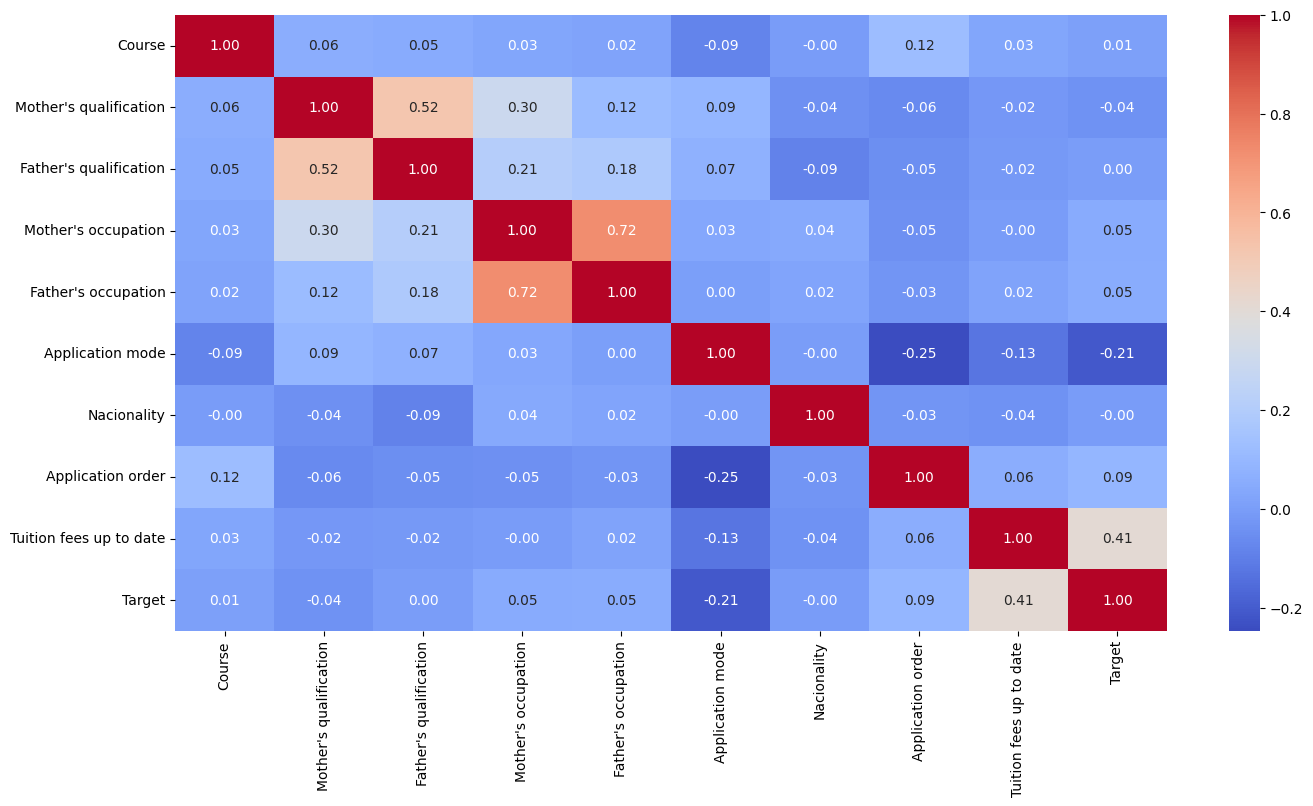

In [77]:
plt.figure(figsize=(16, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [78]:
display(df_encoded.iloc[:, :-1].head())

,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Application mode,Nacionality,Application order,Tuition fees up to date
0,1,12,9,5,9,7,0,5,1
1,10,0,2,3,3,5,0,1,0
2,4,21,26,9,9,0,0,5,0
3,14,22,26,5,3,7,0,2,1
4,2,21,27,9,9,11,0,1,1


Accuracy:  0.5864
Precision: 0.6361
Recall:    0.5864
F1 Score:  0.5084
Log Loss:  0.9019


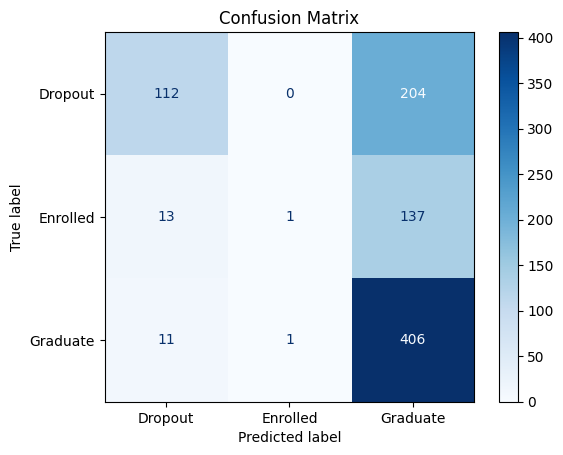


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.8235    0.3544    0.4956       316
    Enrolled     0.5000    0.0066    0.0131       151
    Graduate     0.5435    0.9713    0.6970       418

    accuracy                         0.5864       885
   macro avg     0.6223    0.4441    0.4019       885
weighted avg     0.6361    0.5864    0.5084       885



In [79]:
lr2 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_encoded.iloc[:, :-1],df_encoded["Target"],test_size=0.2,random_state=42)
lr2.fit(X=x_train,y=y_train)

y_pred = lr2.predict(X=x_test)
y_pred_proba = lr2.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

One hot encoded

In [80]:
display(df_one_hot_encoded.iloc[:, :-1].head(5))
display(df_encoded.iloc[:, -1].head(5))

,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Mother's qualification_0,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_7,Mother's qualification_8,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_13,Mother's qualification_14,Mother's qualification_15,Mother's qualification_16,Mother's qualification_17,Mother's qualification_18,Mother's qualification_19,Mother's qualification_20,Mother's qualification_21,Mother's qualification_22,Mother's qualification_23,Mother's qualification_24,Mother's qualification_25,Mother's qualification_26,Mother's qualification_27,Mother's qualification_28,Father's qualification_0,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_7,Father's qualification_8,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_15,Father's qualification_16,Father's qualification_17,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_21,Father's qualification_22,Father's qualification_23,Father's qualification_24,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_28,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_32,Father's qualification_33,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_11,Mother's occupation_12,Mother's occupation_13,Mother's occupation_14,Mother's occupation_15,Mother's occupation_16,Mother's occupation_17,Mother's occupation_18,Mother's occupation_19,Mother's occupation_20,Mother's occupation_21,Mother's occupation_22,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_11,Father's occupation_12,Father's occupation_13,Father's occupation_14,Father's occupation_15,Father's occupation_16,Father's occupation_17,Father's occupation_18,Father's occupation_19,Father's occupation_20,Father's occupation_21,Father's occupation_22,Father's occupation_23,Father's occupation_24,Father's occupation_25,Father's occupation_26,Father's occupation_27,Father's occupation_28,Father's occupation_29,Father's occupation_30,Father's occupation_31,Father's occupation_32,Father's occupation_33,Father's occupation_34,Father's occupation_35,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_6,Application mode_7,Application mode_8,Application mode_9,Application mode_10,Application mode_11,Application mode_12,Application mode_13,Application mode_14,Application mode_15,Application mode_16,Application mode_17,Nacionality_0,Nacionality_1,Nacionality_2,Nacionality_3,Nacionality_4,Nacionality_5,Nacionality_6

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

Accuracy:  0.5661
Precision: 0.5456
Recall:    0.5661
F1 Score:  0.5239
Log Loss:  0.9323


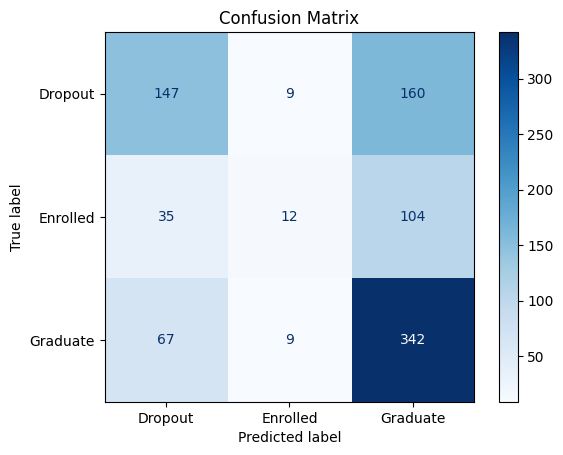


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.5904    0.4652    0.5204       316
    Enrolled     0.4000    0.0795    0.1326       151
    Graduate     0.5644    0.8182    0.6680       418

    accuracy                         0.5661       885
   macro avg     0.5182    0.4543    0.4403       885
weighted avg     0.5456    0.5661    0.5239       885



In [81]:
lr3 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_one_hot_encoded,df_encoded["Target"],test_size=0.2,random_state=42)
lr3.fit(X=x_train,y=y_train)

y_pred = lr3.predict(X=x_test)
y_pred_proba = lr3.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

Aplicando as notas obtidas pelos discentes

In [82]:
df_grades = pd.DataFrame()
for i in ["Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"]:
    df_grades[i] = df[i]
display(df_grades.head(5))

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


0       0
1       2
2       0
3       2
4       2
5       2
6       2
7       0
8       2
9       0
10      2
11      2
12      0
13      2
14      2
15      0
16      1
17      2
18      2
19      1
20      2
21      1
22      2
23      2
24      2
25      1
26      2
27      1
28      2
29      1
30      1
31      2
32      1
33      2
34      2
35      0
36      0
37      0
38      2
39      0
40      0
41      2
42      2
43      0
44      0
45      1
46      2
47      2
48      2
49      2
50      2
51      1
52      1
53      2
54      0
55      2
56      0
57      0
58      2
59      1
60      2
61      2
62      1
63      1
64      1
65      0
66      2
67      2
68      0
69      1
70      1
71      2
72      0
73      0
74      2
75      0
76      0
77      2
78      2
79      2
80      0
81      0
82      0
83      1
84      2
85      2
86      2
87      2
88      1
89      1
90      0
91      2
92      0
93      0
94      2
95      1
96      2
97      2
98      1
99      0


,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


<Axes: >

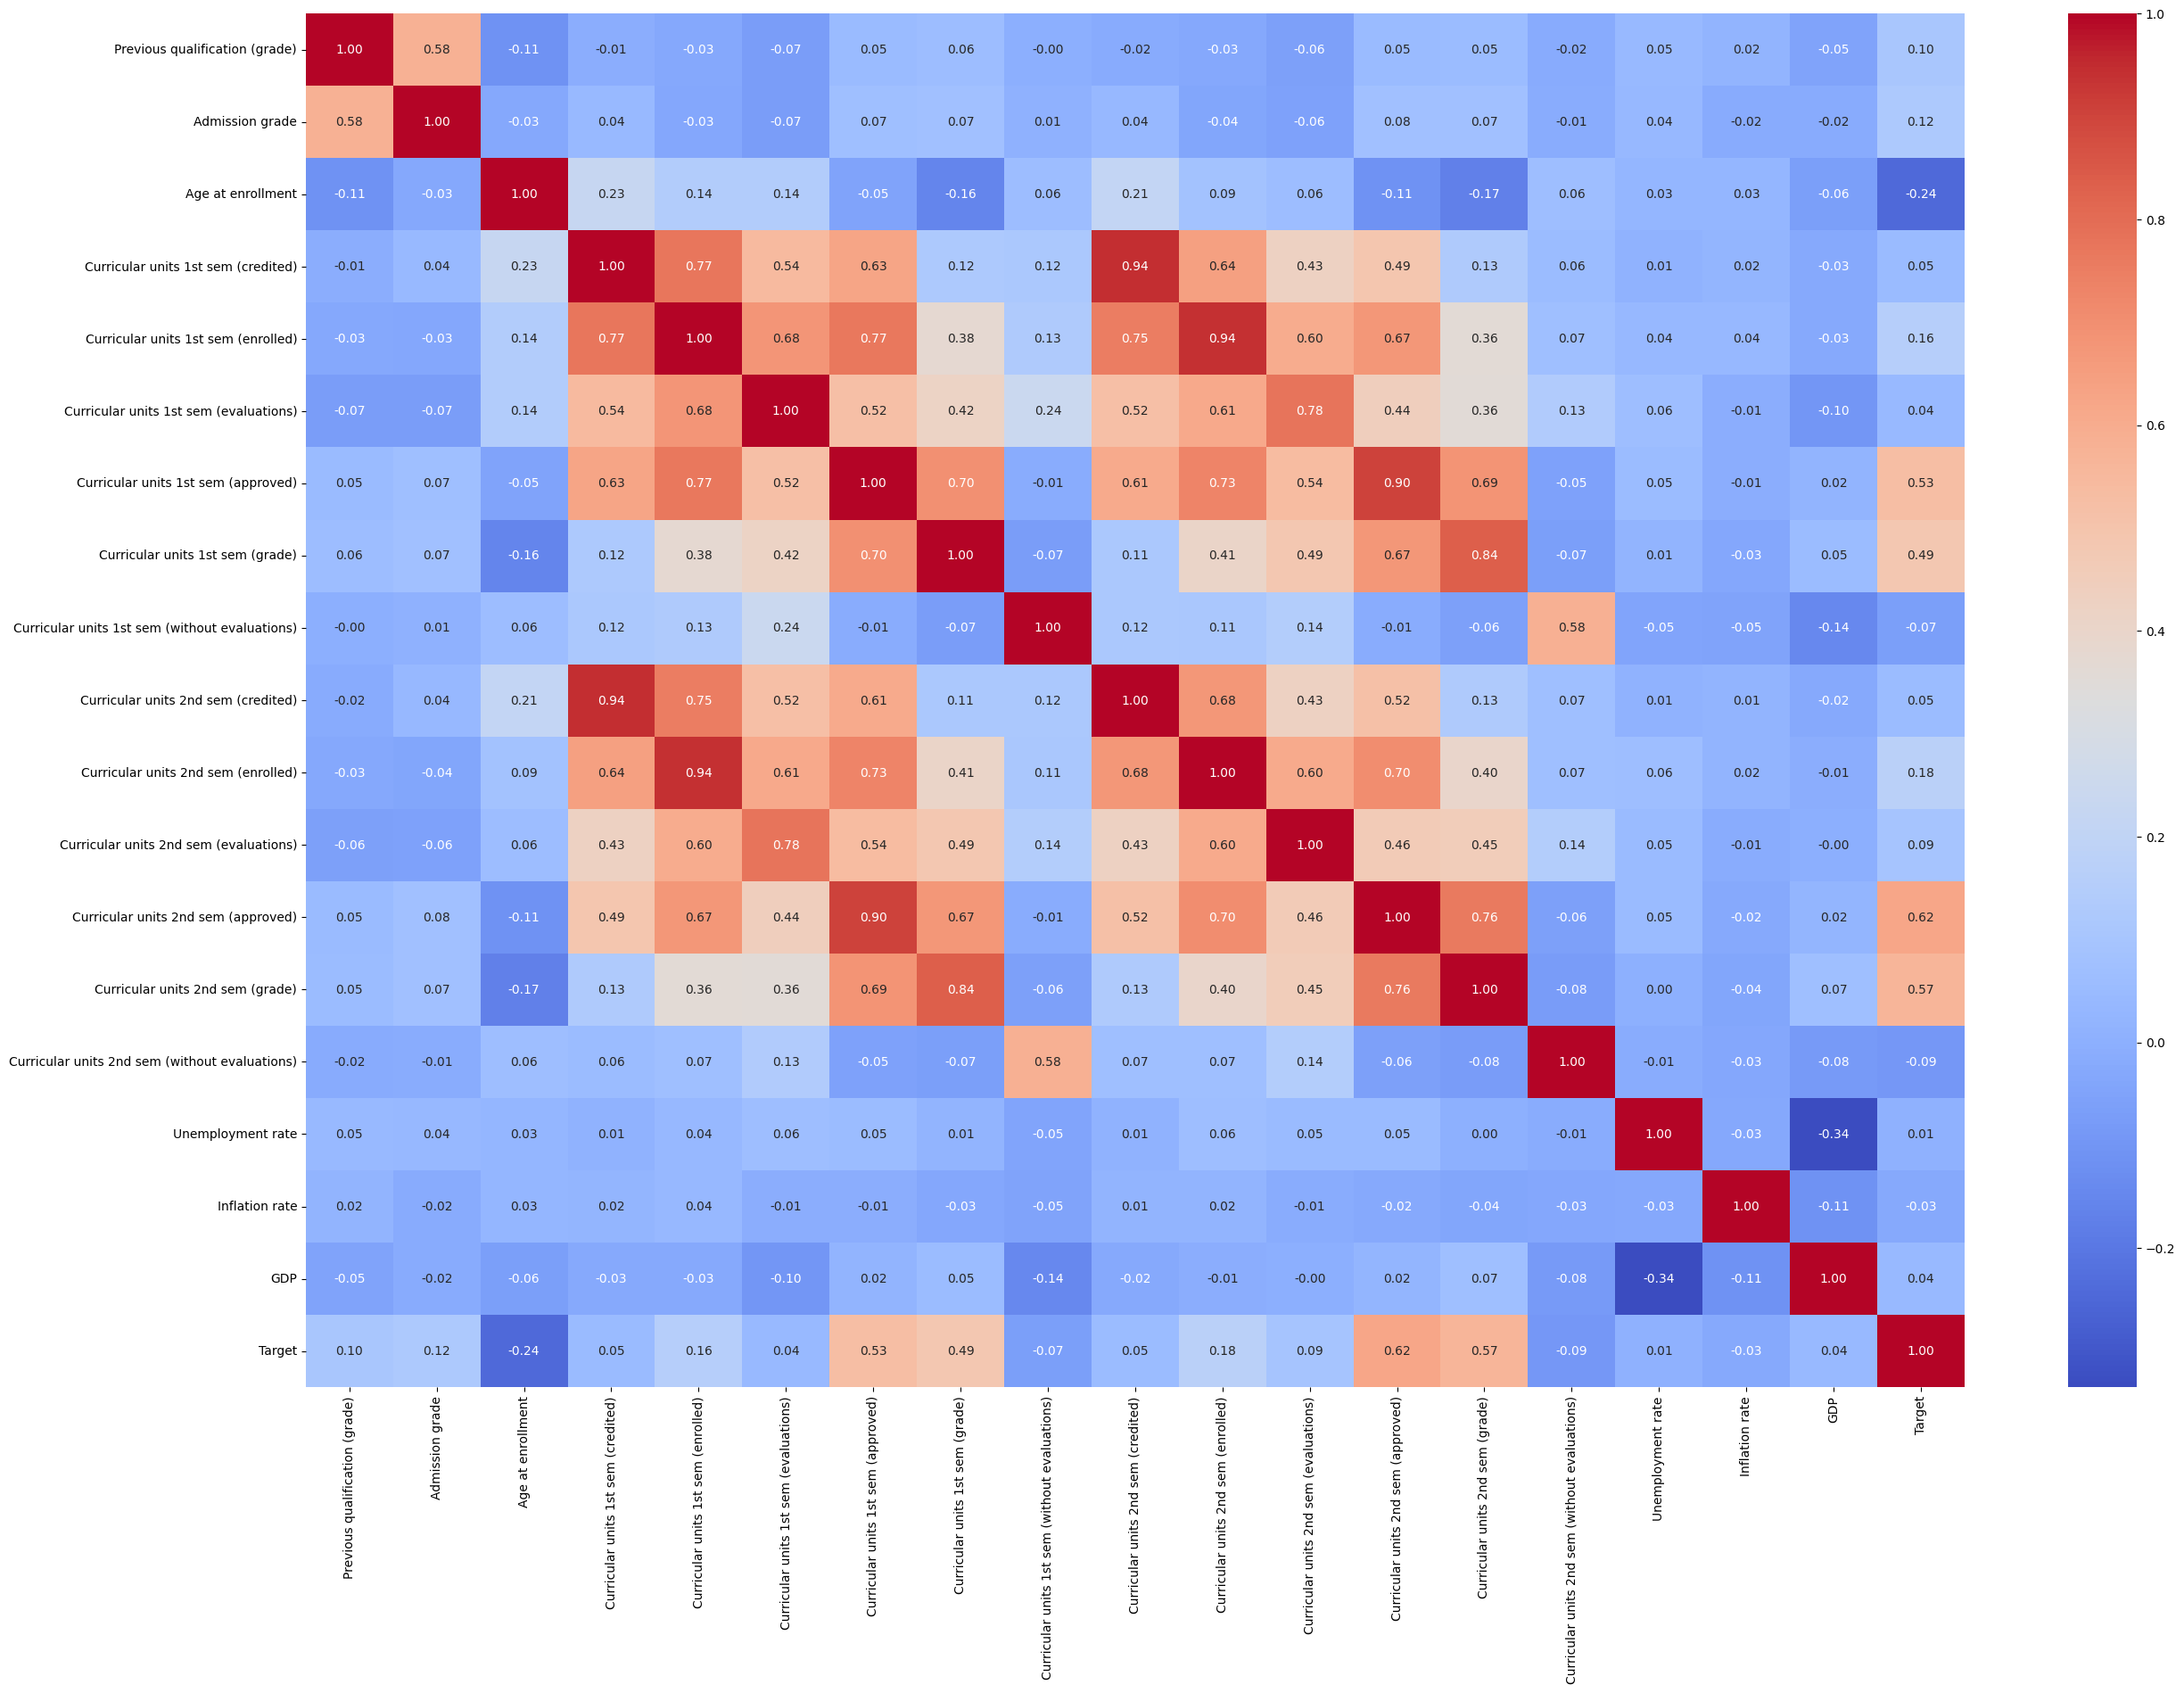

In [83]:
plt.figure(figsize=(30, 20))
display(df_encoded["Target"])
a = pd.concat([df_grades,df_encoded["Target"]],axis=1)
display(a.head(5))
correlation_matrix = a.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


Accuracy:  0.7266
Precision: 0.7003
Recall:    0.7266
F1 Score:  0.7054
Log Loss:  0.6621


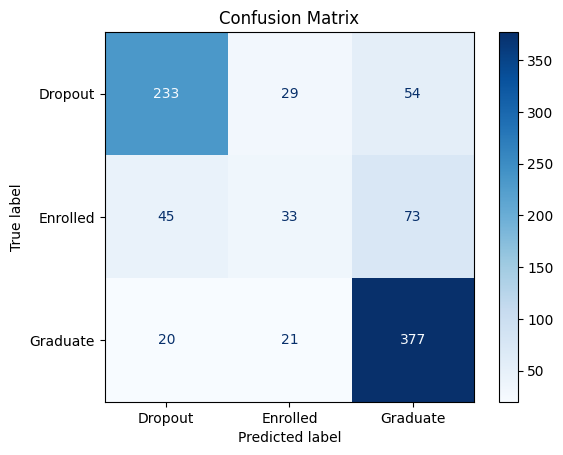


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.7819    0.7373    0.7590       316
    Enrolled     0.3976    0.2185    0.2821       151
    Graduate     0.7480    0.9019    0.8178       418

    accuracy                         0.7266       885
   macro avg     0.6425    0.6193    0.6196       885
weighted avg     0.7003    0.7266    0.7054       885



In [84]:
lr4 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_grades,df_encoded.iloc[:, -1],test_size=0.2,random_state=42)
lr4.fit(X=x_train,y=y_train)

y_pred = lr4.predict(X=x_test)
y_pred_proba = lr4.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

Aplicando as notas com one hot encoding de variaveis

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Mother's qualification_0,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_7,Mother's qualification_8,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_13,Mother's qualification_14,Mother's qualification_15,Mother's qualification_16,Mother's qualification_17,Mother's qualification_18,Mother's qualification_19,Mother's qualification_20,Mother's qualification_21,Mother's qualification_22,Mother's qualification_23,Mother's qualification_24,Mother's qualification_25,Mother's qualification_26,Mother's qualification_27,Mother's qualification_28,Father's qualification_0,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_7,Father's qualification_8,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_15,Father's qualification_16,Father's qualification_17,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_21,Father's qualification_22,Father's qualification_23,Father's qualification_24,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_28,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_32,Father's qualification_33,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_11,Mother's occupation_12,Mother's occupation_13,Mother's occupation_14,Mother's occupation_15,Mother's occupation_16,Mother's occupation_17,Mother's occupation_18,Mother's occupation_19,Mother's occupation_20,Mother's occupation_21,Mother's occupation_22,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_11,Father's occupation_12,Father's occupation_13,Father's occupation_14,Father's occupation_15,Father's occupation_16,Father's occupation_17,Father's occupation_18,Father's occupation_19,Father's occupation_20,Father's occupation_21,Father's occupation_22,Father's occupation_23,Father's occupation_24,Father's occupation_25,Father's occupation_26,Father's occupation_27,Father's occupation_28,Father's occupation_29,Father's occupation_30,Father's occupation_31,Father's occupation_32,Father's occupation_33,Father's occupation_34,Father's occupation_35,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father

Accuracy:  0.7446
Precision: 0.7226
Recall:    0.7446
F1 Score:  0.7257
Log Loss:  0.6391


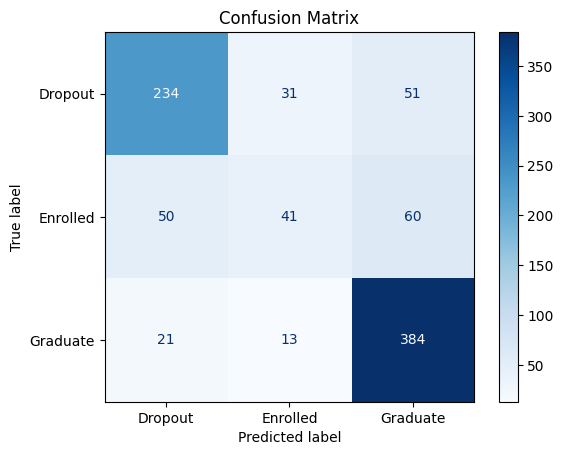


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.7672    0.7405    0.7536       316
    Enrolled     0.4824    0.2715    0.3475       151
    Graduate     0.7758    0.9187    0.8412       418

    accuracy                         0.7446       885
   macro avg     0.6751    0.6436    0.6474       885
weighted avg     0.7226    0.7446    0.7257       885



In [85]:
# Drop duplicate columns if any
df_grades_concat = df_grades.loc[:, ~df_grades.columns.duplicated()]
df_one_hot_encoded_concat = df_one_hot_encoded.loc[:, ~df_one_hot_encoded.columns.duplicated()]

# Now you can safely concatenate
df_grades_one_hot_encoding = pd.concat([df_grades, df_one_hot_encoded], axis=1)

display(df_grades_one_hot_encoding.head(5))

lr5 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_grades_one_hot_encoding, df_encoded.iloc[:, -1],test_size=0.2,random_state=42)
lr5.fit(X=x_train,y=y_train)

y_pred = lr5.predict(X=x_test)
y_pred_proba = lr5.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

Usando standard scaler para variaveis continuas

In [86]:
df_grades_scaled = pd.DataFrame()

for i in [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",

    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]:
    ss = StandardScaler()
    scaled = ss.fit_transform(df[[i]])
    # Now wrap it with correct index
    df_grades_scaled[i] = pd.Series(scaled.flatten(), index=df.index)


In [87]:
display(df[["Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"]].head(5))

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Mother's qualification_0,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_7,Mother's qualification_8,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_13,Mother's qualification_14,Mother's qualification_15,Mother's qualification_16,Mother's qualification_17,Mother's qualification_18,Mother's qualification_19,Mother's qualification_20,Mother's qualification_21,Mother's qualification_22,Mother's qualification_23,Mother's qualification_24,Mother's qualification_25,Mother's qualification_26,Mother's qualification_27,Mother's qualification_28,Father's qualification_0,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_7,Father's qualification_8,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_15,Father's qualification_16,Father's qualification_17,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_21,Father's qualification_22,Father's qualification_23,Father's qualification_24,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_28,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_32,Father's qualification_33,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_11,Mother's occupation_12,Mother's occupation_13,Mother's occupation_14,Mother's occupation_15,Mother's occupation_16,Mother's occupation_17,Mother's occupation_18,Mother's occupation_19,Mother's occupation_20,Mother's occupation_21,Mother's occupation_22,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_11,Father's occupation_12,Father's occupation_13,Father's occupation_14,Father's occupation_15,Father's occupation_16,Father's occupation_17,Father's occupation_18,Father's occupation_19,Father's occupation_20,Father's occupation_21,Father's occupation_22,Father's occupation_23,Father's occupation_24,Father's occupation_25,Father's occupation_26,Father's occupation_27,Father's occupation_28,Father's occupation_29,Father's occupation_30,Father's occupation_31,Father's occupation_32,Father's occupation_33,Father's occupation_34,Father's occupation_35,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_6,Application mode_7,Application mode_8,Application mode_9,Application mode_10,Application mode_11,Application mode_12,Application mode_13,Applicati

Accuracy:  0.6780
Precision: 0.6611
Recall:    0.6780
F1 Score:  0.6497
Log Loss:  0.7475


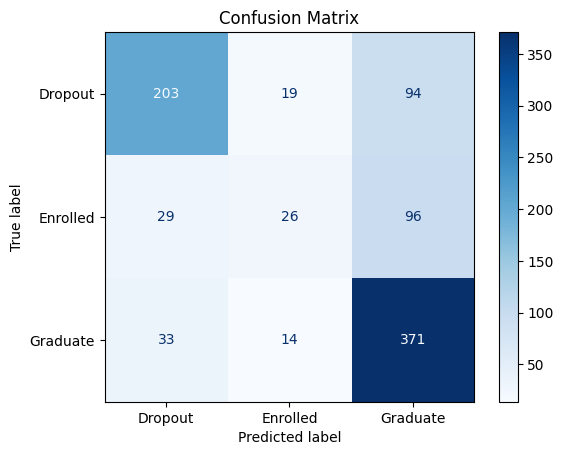


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.7660    0.6424    0.6988       316
    Enrolled     0.4407    0.1722    0.2476       151
    Graduate     0.6613    0.8876    0.7579       418

    accuracy                         0.6780       885
   macro avg     0.6227    0.5674    0.5681       885
weighted avg     0.6611    0.6780    0.6497       885



In [88]:
# Drop duplicate columns if any
df_grades_scaled_concat = df_grades_scaled.loc[:, ~df_grades_scaled.columns.duplicated()]
df_one_hot_encoded_concat = df_one_hot_encoded.loc[:, ~df_one_hot_encoded.columns.duplicated()]

# Now you can safely concatenate
df_grades_one_hot_encoding = pd.concat([df_grades_scaled_concat, df_one_hot_encoded], axis=1)

display(df_grades_one_hot_encoding.head(5))

lr5 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_grades_one_hot_encoding, df_encoded.iloc[:, -1],test_size=0.2,random_state=42)
lr5.fit(X=x_train,y=y_train)

y_pred = lr5.predict(X=x_test)
y_pred_proba = lr5.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

In [89]:
df_curricular = pd.DataFrame()
for i in [        
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)"]:
    ohe = OneHotEncoder(sparse_output=False)
    encoded = ohe.fit_transform(df[[i]])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([i]))
    df_curricular = pd.concat([df_curricular, encoded_df], axis=1)
display(df_curricular.head(5))



,Curricular units 1st sem (credited)_0,Curricular units 1st sem (credited)_1,Curricular units 1st sem (credited)_2,Curricular units 1st sem (credited)_3,Curricular units 1st sem (credited)_4,Curricular units 1st sem (credited)_5,Curricular units 1st sem (credited)_6,Curricular units 1st sem (credited)_7,Curricular units 1st sem (credited)_8,Curricular units 1st sem (credited)_9,Curricular units 1st sem (credited)_10,Curricular units 1st sem (credited)_11,Curricular units 1st sem (credited)_12,Curricular units 1st sem (credited)_13,Curricular units 1st sem (credited)_14,Curricular units 1st sem (credited)_15,Curricular units 1st sem (credited)_16,Curricular units 1st sem (credited)_17,Curricular units 1st sem (credited)_18,Curricular units 1st sem (credited)_19,Curricular units 1st sem (credited)_20,Curricular units 1st sem (enrolled)_0,Curricular units 1st sem (enrolled)_1,Curricular units 1st sem (enrolled)_2,Curricular units 1st sem (enrolled)_3,Curricular units 1st sem (enrolled)_4,Curricular units 1st sem (enrolled)_5,Curricular units 1st sem (enrolled)_6,Curricular units 1st sem (enrolled)_7,Curricular units 1st sem (enrolled)_8,Curricular units 1st sem (enrolled)_9,Curricular units 1st sem (enrolled)_10,Curricular units 1st sem (enrolled)_11,Curricular units 1st sem (enrolled)_12,Curricular units 1st sem (enrolled)_13,Curricular units 1st sem (enrolled)_14,Curricular units 1st sem (enrolled)_15,Curricular units 1st sem (enrolled)_16,Curricular units 1st sem (enrolled)_17,Curricular units 1st sem (enrolled)_18,Curricular units 1st sem (enrolled)_19,Curricular units 1st sem (enrolled)_21,Curricular units 1st sem (enrolled)_23,Curricular units 1st sem (enrolled)_26,Curricular units 1st sem (evaluations)_0,Curricular units 1st sem (evaluations)_1,Curricular units 1st sem (evaluations)_2,Curricular units 1st sem (evaluations)_3,Curricular units 1st sem (evaluations)_4,Curricular units 1st sem (evaluations)_5,Curricular units 1st sem (evaluations)_6,Curricular units 1st sem (evaluations)_7,Curricular units 1st sem (evaluations)_8,Curricular units 1st sem (evaluations)_9,Curricular units 1st sem (evaluations)_10,Curricular units 1st sem (evaluations)_11,Curricular units 1st sem (evaluations)_12,Curricular units 1st sem (evaluations)_13,Curricular units 1st sem (evaluations)_14,Curricular units 1st sem (evaluations)_15,Curricular units 1st sem (evaluations)_16,Curricular units 1st sem (evaluations)_17,Curricular units 1st sem (evaluations)_18,Curricular units 1st sem (evaluations)_19,Curricular units 1st sem (evaluations)_20,Curricular units 1st sem (evaluations)_21,Curricular units 1st sem (evaluations)_22,Curricular units 1st sem (evaluations)_23,Curricular units 1st sem (evaluations)_24,Curricular units 1st sem (evaluations)_25,Curricular units 1st sem (evaluations)_26,Curricular units 1st sem (evaluations)_27,Curricular units 1st sem (evaluations)_28,Curricular units 1st sem (evaluations)_29,Curricular units 1st sem (evaluations)_31,Curricular units 1st sem (evaluations)_32,Curricular units 1st sem (evaluations)_33,Curricular units 1st sem (evaluations)_36,Curricular units 1st sem (evaluations)_45,Curricular units 1st sem (approved)_0,Curricular units 1st sem (approved)_1,Curricular units 1st sem (approved)_2,Curricular units 1st sem (approved)_3,Curricular units 1st sem (approved)_4,Curricular units 1st sem (approved)_5,Curricular units 1st sem (approved)_6,Curricular units 1st sem (approved)_7,Curricular units 1st sem (approved)_8,Curricular units 1st sem (approved)_9,Curricular units 1st sem (approved)_10,Curricular units 1st sem (approved)_11,Curricular units 1st sem (approved)_12,Curricular units 1st sem (approved)_13,Curricular units 1st sem (approved)_14,Curricular units 1st sem (approved)_15,Curricular units 1st sem (approved)_16,Curricular units 1st sem (approved)_17,Curricular units 1st sem (approved)_18,Curricular units 1st sem (approved)_19,Curricular units 1st sem (approved)_20,Curricular units 1st sem (approved

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Course_0,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Mother's qualification_0,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_7,Mother's qualification_8,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_13,Mother's qualification_14,Mother's qualification_15,Mother's qualification_16,Mother's qualification_17,Mother's qualification_18,Mother's qualification_19,Mother's qualification_20,Mother's qualification_21,Mother's qualification_22,Mother's qualification_23,Mother's qualification_24,Mother's qualification_25,Mother's qualification_26,Mother's qualification_27,Mother's qualification_28,Father's qualification_0,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_7,Father's qualification_8,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_15,Father's qualification_16,Father's qualification_17,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_21,Father's qualification_22,Father's qualification_23,Father's qualification_24,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_28,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_32,Father's qualification_33,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother's occupation_11,Mother's occupation_12,Mother's occupation_13,Mother's occupation_14,Mother's occupation_15,Mother's occupation_16,Mother's occupation_17,Mother's occupation_18,Mother's occupation_19,Mother's occupation_20,Mother's occupation_21,Mother's occupation_22,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Father's occupation_0,Father's occupation_1,Father's occupation_2,Father's occupation_3,Father's occupation_4,Father's occupation_5,Father's occupation_6,Father's occupation_7,Father's occupation_8,Father's occupation_9,Father's occupation_10,Father's occupation_11,Father's occupation_12,Father's occupation_13,Father's occupation_14,Father's occupation_15,Father's occupation_16,Father's occupation_17,Father's occupation_18,Father's occupation_19,Father's occupation_20,Father's occupation_21,Father's occupation_22,Father's occupation_23,Father's occupation_24,Father's occupation_25,Father's occupation_26,Father's occupation_27,Father's occupation_28,Father's occupation_29,Father's occupation_30,Father's occupation_31,Father's occupation_32,Father's occupation_33,Father's occupation_34,Father's occupation_35,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_6,Application mode_7,Application mode_8,Application mode_9,Application mode_10,Application mode_11,Application mode_12,Application mode_13,Applicati

Accuracy:  0.7367
Precision: 0.7259
Recall:    0.7367
F1 Score:  0.7274
Log Loss:  0.6597


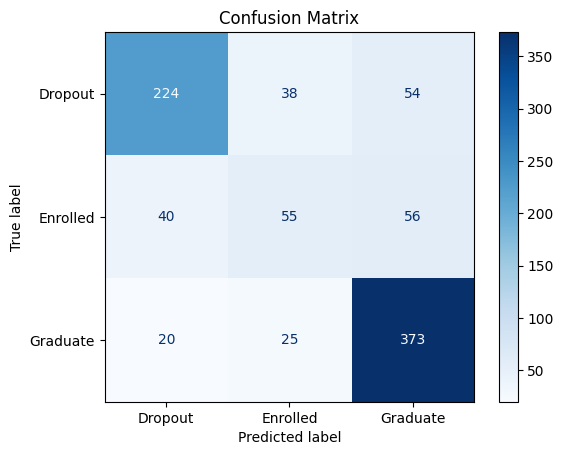


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.7887    0.7089    0.7467       316
    Enrolled     0.4661    0.3642    0.4089       151
    Graduate     0.7723    0.8923    0.8280       418

    accuracy                         0.7367       885
   macro avg     0.6757    0.6551    0.6612       885
weighted avg     0.7259    0.7367    0.7274       885



In [90]:
df_curricular_concat = df_curricular.loc[:, ~df_curricular.columns.duplicated()]
# Drop duplicate columns if any
df_grades_scaled_concat = df_grades_scaled.loc[:, ~df_grades_scaled.columns.duplicated()]
df_one_hot_encoded_concat = df_one_hot_encoded.loc[:, ~df_one_hot_encoded.columns.duplicated()]

# Now you can safely concatenate
df_grades_one_hot_encoding = pd.concat([df_grades_scaled_concat, df_one_hot_encoded,df_curricular_concat], axis=1)

display(df_grades_one_hot_encoding.head(5))

lr6 = LogisticRegression(max_iter=max_iter)
x_train, x_test, y_train, y_test = train_test_split(df_grades_one_hot_encoding, df_encoded.iloc[:, -1],test_size=0.2,random_state=42)
lr6.fit(X=x_train,y=y_train)

y_pred = lr6.predict(X=x_test)
y_pred_proba = lr6.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)

# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(lr1.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))

PCA

RFE

Matriz de confusão e precisão por classe (acurácia balanceada)

Random Forest

Optuna
